# Overview:
In this third practical application assignment, your goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) you encountered in this section of the program. You will use a dataset related to the marketing of bank products over the telephone.

## Data:
The dataset you will use comes from the [UCI Machine Learning repository](https://archive.ics.uci.edu/dataset/222/bank+marketing). The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. You can make use of the article Links to an external site.accompanying the dataset (in the .zip file) for more information on the data and features.

## Deliverables:
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

This is a required assignment and counts toward program completion.



# Dataset

   ##Input variables:
   ### bank client data:
   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5. default: has credit in default? (categorical: "no","yes","unknown")
   6. housing: has housing loan? (categorical: "no","yes","unknown")
   7. loan: has personal loan? (categorical: "no","yes","unknown")
   ### related with the last contact of the current campaign:
   8. contact: contact communication type (categorical: "cellular","telephone") 
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ### other attributes:
  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (numeric)
  15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   ### social and economic context attributes
  16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17. cons.price.idx: consumer price index - monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19. euribor3m: euribor 3 month rate - daily indicator (numeric)
  20. nr.employed: number of employees - quarterly indicator (numeric)

  ## Output variable (desired target):
  21. - y - has the client subscribed a term deposit? (binary: "yes","no")



### Business Problem
Due to internal competition and
current financial crisis, there are huge pressures for
European banks to increase financial assets. 

To solve this
issue, one adopted strategy is offer attractive long-term
deposit applications with good interest rates, in particular
by using directed marketing campaigns.

The primary goal is to increase the 
efficiency of these directed campaigns for long-term deposit
subscriptions by reducing the number of contacts required for each successful outcome.

Thus,
there is a need for an improvement in efficiency: fewer
contacts should be done, but an approximately number of
successes (clients subscribing the deposit) should be kept.

### Data Problem
Based on the dataset, build a predictive model which classifies prospective applicants into two classes:
1. Likely to purchase with minimal contacts.
2. Unlikely to purchase or likely to require many contacts.

The model will be built from the subset of the dataset with:
* known outcome
* known contact result
* sufficient other input data fields necessary to predict the outcome

Accordingly, the model will maximize accuracy for a combined compound outcome metric built from outcome 'y' and the contact result fields (campaign + previous).

### Descriptive and Inferential Statistics
| **Aspect**                | **Descriptive Statistics**                                          | **Inferential Statistics**                                                   |
|---------------------------|---------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Purpose**                | Summarizes the characteristics of a dataset.                       | Draws conclusions or makes predictions about a population from a sample.     |
| **Focus**                  | Focuses on presenting raw data as insights (e.g., mean, median).   | Focuses on making generalizations beyond the data (e.g., confidence intervals). |
| **Techniques Used**        | Measures like mean, median, mode, range, and standard deviation.   | Techniques like hypothesis testing, regression, and confidence intervals.    |
| **Data Scope**             | Describes only the observed dataset.                               | Attempts to make inferences about a broader population from the dataset.     |
| **Complexity**             | Simpler, deals only with what is observed.                         | More complex, involving probability theory and sampling methods.             |


### Findings

### Next Steps and Recommendations


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
#import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [239]:
bank = pd.read_csv('data/bank-additional.csv', sep=';')
orig = pd.read_csv('data/bank-additional.csv', sep=';') # use as reference copy

In [240]:
#data
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Considerations for Bank model

* many parameters
* many need to be encoded
* unbalanced
* 'duration' - last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


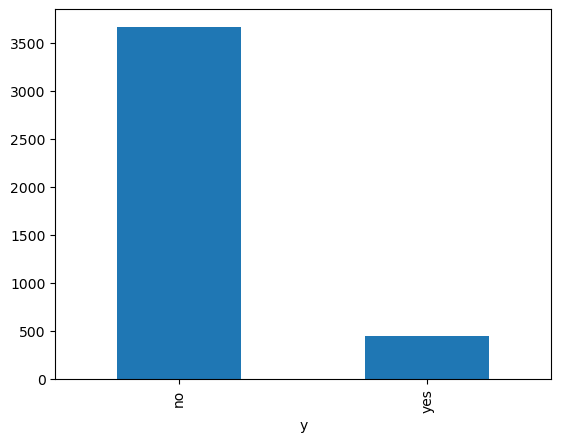

In [241]:
#build a histogram of the y counts
bank['y'].value_counts().plot(kind='bar')
plt.show()



### Data Prep

#### notes from article
* Understanding we transformed the output into a binary
task, by using only the conclusive results of Table 1:
successful and unsuccessful.
* Hence,
the non-conclusive instances were discarded, leading to a
total of 55817 contacts (the same 6499 successes).
* For example, Figure 2 shows that the Sex attribute can be
discarded, since the rate of successes for Male and Female
is almost the same. 
* Since we had a large dataset, we opted to discard
the examples that contained missing values, leading to a
dataset with 45211 instances (5289 of which were
successful – 11.7% success rate).




In [242]:
# replace the y values with 0 and 1
bank['y'] = bank['y'].replace('no', 0)
bank['y'] = bank['y'].replace('yes', 1)



In [243]:
# look at the column types
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [244]:
# get the counts of the education column
bank['education'].value_counts()

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

In [245]:
# look at the value counts for all the non-numeric columns
for col in bank.columns:
    if bank[col].dtype == 'object':
        print(bank[col].value_counts())
        print('\n')

        

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64


marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64


education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64


default
no         3315
unknown     803
yes           1
Name: count, dtype: int64


housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64


loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64


contact
cellular     2652
telephone    1467
Name: count, dtype: int64


month
may    1378

# Data subsetting

In [246]:


y = bank['y']
X = bank.loc[:, 'age':'nr.employed']

X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [247]:
# numeric encode the education column
ed_values = {'education': ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown']}

# Define a mapping dictionary for education levels
ed_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': -1
}

# Create a new column 'education_encoded' using the mapping
X['education_encoded'] = X['education'].map(ed_mapping)

#replace the unknown values with the mean of the known values in the education_encoded column
mean_ed = round(X[X['education_encoded'] != -1]['education_encoded'].mean())
X['education_encoded'] = X['education_encoded'].replace(-1, mean_ed)

In [248]:
# drop the original education column
X = X.drop('education', axis=1)
X.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_encoded
0,30,blue-collar,married,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,3
1,39,services,single,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,4
2,25,services,married,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,4
3,38,services,married,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,3
4,47,admin.,married,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,6


In [259]:
# numeric encode the day_of_week column
day_mapping = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5
}

X['day_of_week_encoded'] = X['day_of_week'].map(day_mapping)

# drop the original day_of_week column
X = X.drop('day_of_week', axis=1)

X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month_encoded,day_of_week_encoded
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,True,False,False,True,False,False,True,False,5,5
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,True,False,False,False,True,False,True,False,5,5
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,True,False,False,False,True,False,True,False,6,3
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,True,False,False,True,False,True,False,6,5
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,True,False,False,True,False,False,True,False,11,1


In [258]:
# numeric encode the month column
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

X['month_encoded'] = X['month'].map(month_mapping)

# drop the original month column
X = X.drop('month', axis=1)

X.head()

,age,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month_encoded
0,30,fri,487,2,999,0,-1.8,92.893,-46.2,1.313,...,True,True,False,False,True,False,False,True,False,5
1,39,fri,346,4,999,0,1.1,93.994,-36.4,4.855,...,False,True,False,False,False,True,False,True,False,5
2,25,wed,227,1,999,0,1.4,94.465,-41.8,4.962,...,True,True,False,False,False,True,False,True,False,6
3,38,fri,17,3,999,0,1.4,94.465,-41.8,4.959,...,False,False,True,False,False,True,False,True,False,6
4,47,mon,58,1,999,0,-0.1,93.200,-42.0,4.191,...,True,True,False,False,True,False,False,True,False,11


In [260]:
# list the remaining non-numeric columns

for col in X.columns:
    if X[col].dtype == 'object':
        print(col)
        

In [261]:
# drop the duration column
X = X.drop('duration', axis=1)

In [255]:
# one-hot encode the remaining columns
X = pd.get_dummies(X, columns=['job', 'marital', 'default', 'housing', 'loan','contact', 'poutcome'])

X.head()




,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,may,fri,487,2,999,0,-1.8,92.893,-46.2,...,False,True,True,False,False,True,False,False,True,False
1,39,may,fri,346,4,999,0,1.1,93.994,-36.4,...,False,False,True,False,False,False,True,False,True,False
2,25,jun,wed,227,1,999,0,1.4,94.465,-41.8,...,False,True,True,False,False,False,True,False,True,False
3,38,jun,fri,17,3,999,0,1.4,94.465,-41.8,...,True,False,False,True,False,False,True,False,True,False
4,47,nov,mon,58,1,999,0,-0.1,93.200,-42.0,...,False,True,True,False,False,True,False,False,True,False


In [257]:
# set y to the 'y' column
y = bank['y']


In [262]:
#sepate the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Model Building

## Decision Tree

In [263]:
# build a decision tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
%time
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'DT Model accuracy: {accuracy:.2f}')


CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.77 µs
DT Model accuracy: 0.85


In [284]:
# do a grid search to find the best hyperparameters for a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dt_model_search(X_train, y_train, verbose=False, scoring='accuracy'):
    if (verbose) :
        print('\nDecision Tree Classifier:\n------------------------\n')

    tree = DecisionTreeClassifier(random_state=17)

    tree_params = {'max_depth': range(1, 11),
                    'max_features': range(4, 19)}

    tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=verbose, scoring=scoring)

    tree_grid.fit(X_train, y_train)

    if (verbose) :
        # print the best hyperparameters
        print(f'Parameters: {tree_grid.best_params_}')
        print(f'Accuracy: {tree_grid.best_score_}')

    return tree_grid.best_estimator_



In [266]:

clf = dt_model_search(X_train, y_train)


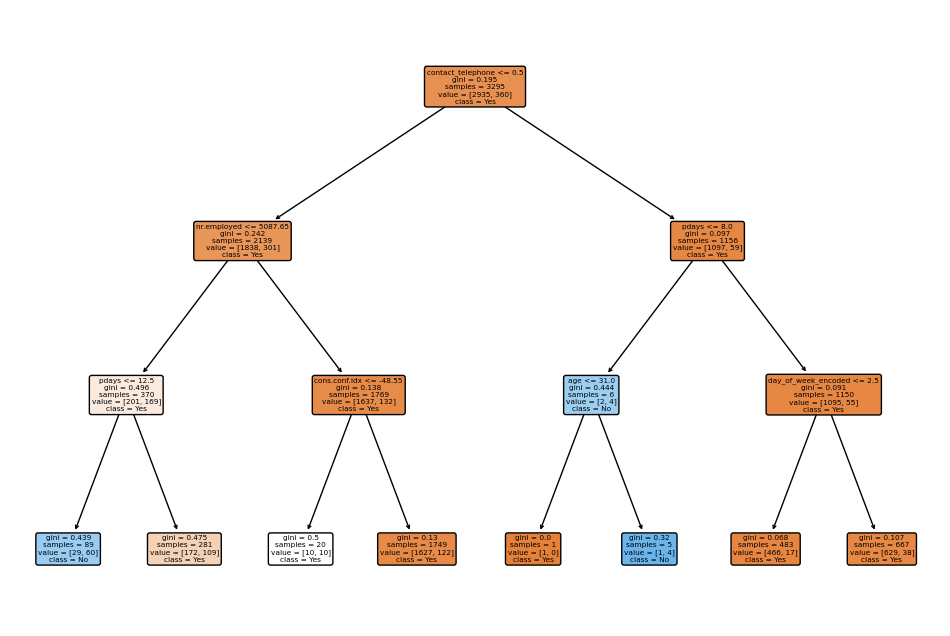

In [267]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a plot of the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Yes','No'], rounded=True)
plt.show()


Feature ranking:
1. feature 8 (0.7107322062593248) - nr.employed
2. feature 2 (0.1244528619086518) - pdays
3. feature 36 (0.09599946848533542) - contact_telephone
4. feature 6 (0.05821989076384207) - cons.conf.idx
5. feature 0 (0.008482907910586389) - age
6. feature 41 (0.0021126646722595815) - day_of_week_encoded
7. feature 35 (0.0) - contact_cellular
8. feature 34 (0.0) - loan_yes
9. feature 15 (0.0) - job_retired
10. feature 14 (0.0) - job_management
11. feature 13 (0.0) - job_housemaid
12. feature 12 (0.0) - job_entrepreneur
13. feature 11 (0.0) - job_blue-collar
14. feature 10 (0.0) - job_admin.
15. feature 9 (0.0) - education_encoded
16. feature 37 (0.0) - poutcome_failure
17. feature 7 (0.0) - euribor3m
18. feature 38 (0.0) - poutcome_nonexistent
19. feature 5 (0.0) - cons.price.idx
20. feature 4 (0.0) - emp.var.rate
21. feature 3 (0.0) - previous
22. feature 39 (0.0) - poutcome_success
23. feature 1 (0.0) - campaign
24. feature 16 (0.0) - job_self-employed
25. feature 17 (0.0) 

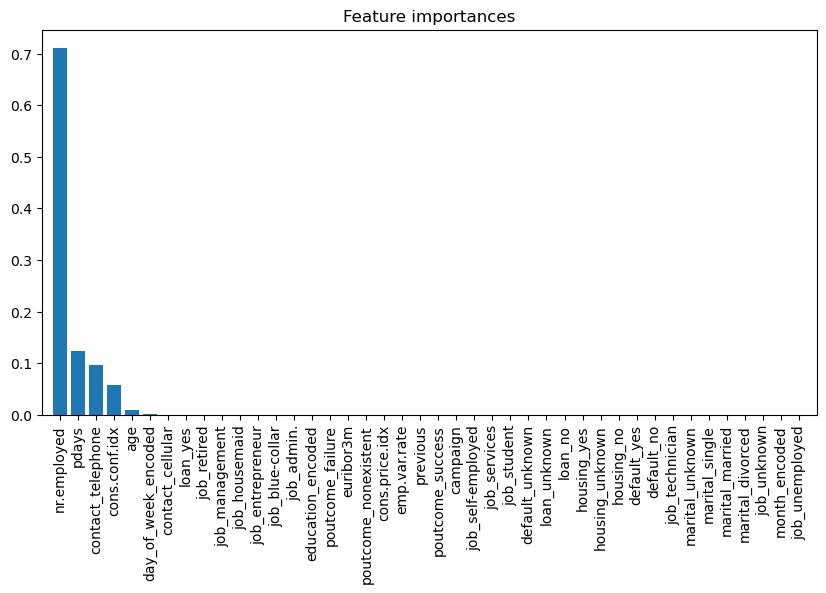

In [268]:
import numpy as np

# show the feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X.columns[indices[f]]}")

# plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


#### Logistic Regression Model

In [269]:

# build a logistic regression model
lgr_model = LogisticRegression(max_iter=10000)
%time
lgr_model.fit(X_train, y_train)

y_pred = lgr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'LR Model accuracy: {accuracy:.2f}')


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs
LR Model accuracy: 0.91


In [285]:
# do a grid search to find the best hyperparameters for a logistic regression model
from sklearn.model_selection import GridSearchCV

def lgr_search(X_train, y_train, verbose=False, scoring='accuracy'):
    if (verbose) :
        print('\nLogistic Regression:\n-------------------')
        
    lgr = LogisticRegression(max_iter=10000)

    lgr_params = {'C': [0.01, 0.1, 1, 10, 100]}
    lgr_grid = GridSearchCV(lgr, lgr_params, cv=5, n_jobs=-1, verbose=verbose, scoring=scoring)

    lgr_grid.fit(X_train, y_train)

    if (verbose) :
        # print the best hyperparameters
        print(f'Parameters:{lgr_grid.best_params_}')
        print(f'Accuracy:{lgr_grid.best_score_}')

    return lgr_grid.best_estimator_

lgr_model = lgr_search(X_train, y_train, True)


Logistic Regression:
-------------------
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Parameters:{'C': 0.01}
Accuracy:0.8980273141122913


Coefficient ranking:
1. feature 5 (0.2959241398050951) - cons.price.idx
2. feature 7 (-0.1410131605344999) - euribor3m
3. feature 4 (-0.10529301989524872) - emp.var.rate
4. feature 35 (0.09639225069710633) - contact_cellular
5. feature 36 (-0.09409398841227791) - contact_telephone
6. feature 1 (-0.09188918716058271) - campaign
7. feature 9 (0.06394075514799351) - education_encoded
8. feature 37 (-0.054793992830990956) - poutcome_failure
9. feature 24 (0.04819346046074807) - marital_single
10. feature 23 (-0.04523097603669099) - marital_married
11. feature 38 (0.03863840414440587) - poutcome_nonexistent
12. feature 14 (-0.03824522662001953) - job_management
13. feature 19 (0.03693804046581785) - job_technician
14. feature 10 (0.03626026298575963) - job_admin.
15. feature 11 (-0.03498205945335078) - job_blue-collar
16. feature 6 (0.03261275342207869) - cons.conf.idx
17. feature 29 (0.02938462756536108) - housing_no
18. feature 15 (0.02243547015713837) - job_retired
19. feature 18 (0.0218

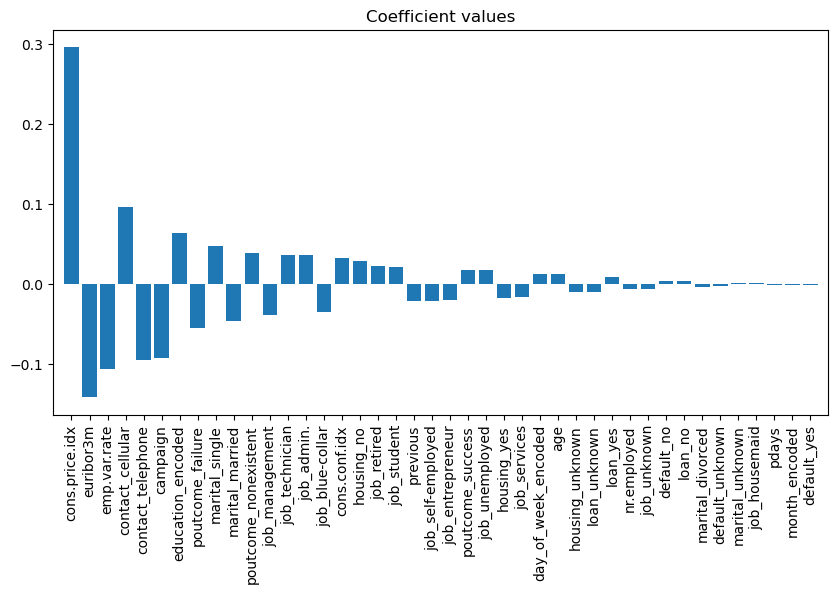

In [271]:
# show the coefficients
coefficients = lgr_model.coef_[0]
indices = np.argsort(np.abs(coefficients))[::-1]

print("Coefficient ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({coefficients[indices[f]]}) - {X.columns[indices[f]]}")

# plot the coefficients
plt.figure(figsize=(10, 5))
plt.title("Coefficient values")
plt.bar(range(X.shape[1]), coefficients[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


### Decision Tree

### KNN

In [272]:
# build a KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

for i in range(1, 11):
    # build a pipeline with a scaler and a KNN model
    knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=i))])
    knn_pipe.fit(X_train, y_train)
    knn_model = knn_pipe.named_steps['knn']
    print(f'KNN Model accuracy with {i} neighbors: {knn_model.score(X_test, y_test)}')
    print(f'KNN Model training accuracy with {i} neighbors: {knn_model.score(X_train, y_train)}')
    print(f'KNN Model precision with {i} neighbors: {precision_score(y_test, knn_model.predict(X_test))}')
    print()

    


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anac

KNN Model accuracy with 1 neighbors: 0.8895631067961165
KNN Model training accuracy with 1 neighbors: 0.8907435508345979
KNN Model precision with 1 neighbors: 0.0

KNN Model accuracy with 2 neighbors: 0.8895631067961165
KNN Model training accuracy with 2 neighbors: 0.8907435508345979
KNN Model precision with 2 neighbors: 0.0

KNN Model accuracy with 3 neighbors: 0.8895631067961165
KNN Model training accuracy with 3 neighbors: 0.8907435508345979


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anac

KNN Model precision with 3 neighbors: 0.0

KNN Model accuracy with 4 neighbors: 0.8895631067961165
KNN Model training accuracy with 4 neighbors: 0.8907435508345979
KNN Model precision with 4 neighbors: 0.0

KNN Model accuracy with 5 neighbors: 0.8895631067961165
KNN Model training accuracy with 5 neighbors: 0.8907435508345979
KNN Model precision with 5 neighbors: 0.0

KNN Model accuracy with 6 neighbors: 0.8895631067961165
KNN Model training accuracy with 6 neighbors: 0.8907435508345979
KNN Model precision with 6 neighbors: 0.0

KNN Model accuracy with 7 neighbors: 0.8895631067961165
KNN Model training accuracy with 7 neighbors: 0.8907435508345979
KNN Model precision with 7 neighbors: 0.0

KNN Model accuracy with 8 neighbors: 0.8895631067961165
KNN Model training accuracy with 8 neighbors: 0.8907435508345979
KNN Model precision with 8 neighbors: 0.0

KNN Model accuracy with 9 neighbors: 0.8895631067961165


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anac

KNN Model training accuracy with 9 neighbors: 0.8907435508345979
KNN Model precision with 9 neighbors: 0.0

KNN Model accuracy with 10 neighbors: 0.8895631067961165
KNN Model training accuracy with 10 neighbors: 0.8907435508345979
KNN Model precision with 10 neighbors: 0.0



/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anac

In [273]:

knn_model = KNeighborsClassifier(n_neighbors=8)
%time
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Model accuracy: {accuracy}')
print(f'KNN Model training accuracy: {knn_model.score(X_train, y_train)}')

#print the parameters of the KNN model
print(knn_model.get_params())



CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.77 µs
KNN Model accuracy: 0.9077669902912622
KNN Model training accuracy: 0.9025796661608497
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}


In [286]:
# do a grid search to find the best parameters for the KNN model
from sklearn.model_selection import GridSearchCV

def knn_search(X_train, y_train, verbose=False, scoring='accuracy'):
    if (verbose) :
        print('\nK-Nearest Neighbors:\n-------------------')

    # build a pipeline with a scaler and a KNN model
    knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

    knn_params = {
        'knn__n_neighbors': range(1, 11),
        'knn__weights': ['uniform', 'distance'],
        'knn__p': [1, 2]
    }

    knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=verbose, scoring=scoring)

    knn_grid.fit(X_train, y_train)

    if (verbose) :
        print(f'Parameters: {knn_grid.best_params_}')
        print(f'Accuracy: {knn_grid.best_score_}')

    return knn_grid.best_estimator_

knn_model = knn_search(X_train, y_train, True)



K-Nearest Neighbors:
-------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Parameters: {'knn__n_neighbors': 8, 'knn__p': 2, 'knn__weights': 'uniform'}
Accuracy: 0.8965098634294385


Permutation importance ranking:
1. feature 39 (0.013956310679611627) - poutcome_success
2. feature 3 (0.009830097087378609) - previous
3. feature 2 (0.009101941747572794) - pdays
4. feature 38 (0.003519417475728115) - poutcome_nonexistent
5. feature 37 (0.0032766990291261734) - poutcome_failure
6. feature 8 (0.0030339805825242315) - nr.employed
7. feature 40 (0.001941747572815522) - month_encoded
8. feature 29 (0.0016990291262135692) - housing_no
9. feature 20 (0.0010922330097086874) - job_unemployed
10. feature 17 (0.0009708737864077222) - job_services
11. feature 18 (0.000849514563106768) - job_student
12. feature 31 (0.0008495145631067569) - housing_yes
13. feature 41 (0.0006067961165048374) - day_of_week_encoded
14. feature 10 (0.0004854368932038722) - job_admin.
15. feature 0 (0.0004854368932038611) - age
16. feature 15 (0.0003640776699029069) - job_retired
17. feature 21 (0.00036407766990289583) - job_unknown
18. feature 9 (0.0003640776699028847) - education_encoded
19. feature 2

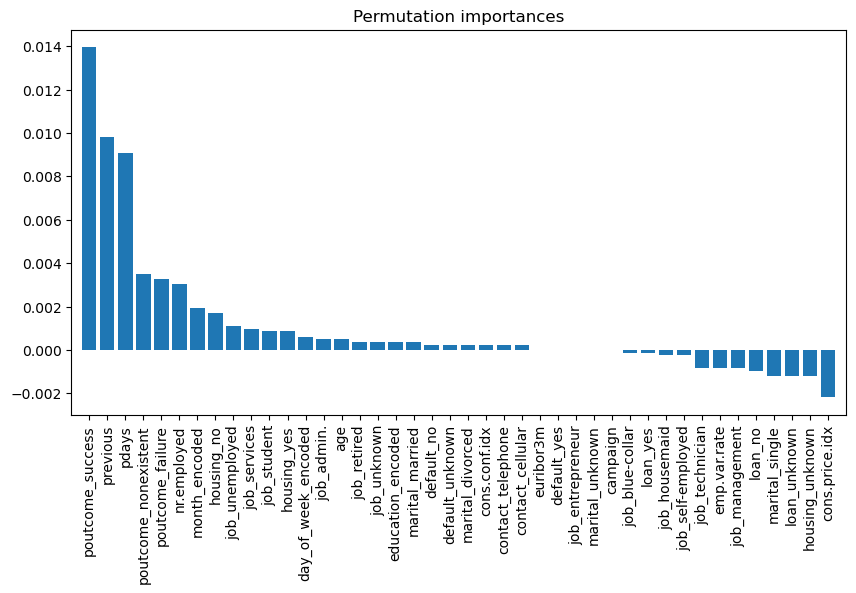

In [275]:
# show the permutation importances
from sklearn.inspection import permutation_importance

result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=17, n_jobs=-1)
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

print("Permutation importance ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X.columns[indices[f]]}")

# plot the permutation importances
plt.figure(figsize=(10, 5))
plt.title("Permutation importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


### SVM

In [276]:
#build an SVM model
from sklearn.svm import SVC

svm_model = SVC()
%time
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model accuracy: {accuracy:.2f}')


CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
SVM Model accuracy: 0.92


In [287]:
def svm_search(X_train, y_train, verbose=False, scoring='accuracy'):
    if (verbose) :
        print('\nSupport Vector Machine:\n----------------------')

    # build a pipeline with a scaler and an SVM model
    svm_pipe = Pipeline([('scale', StandardScaler()), ('svm', SVC())])

    svm_params = {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf'],
        'svm__gamma': ['scale', 'auto']
    }

    svm_grid = GridSearchCV(svm_pipe, svm_params, cv=5, n_jobs=-1, verbose=verbose, scoring=scoring)

    svm_grid.fit(X_train, y_train)

    if (verbose) :
        print(f'Parameters: {svm_grid.best_params_}')
        print(f'Accuracy: {svm_grid.best_score_}')

    return svm_grid.best_estimator_

svm_model = svm_search(X_train, y_train, True)


Support Vector Machine:
----------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Accuracy: 0.8992412746585737


Support vectors: [[-1.27504971 -0.59229792  0.20103745 ... -0.18930871  0.14642078
  -0.68012702]
 [-0.79005805 -0.59229792  0.20103745 ... -0.18930871  1.59960293
  -1.38931011]
 [ 1.73189861 -0.59229792  0.20103745 ... -0.18930871  0.14642078
   0.73823914]
 ...
 [-0.11106971  0.173194    0.20103745 ... -0.18930871  0.14642078
  -1.38931011]
 [ 1.63490028 -0.20955196  0.20103745 ... -0.18930871 -0.33797327
  -1.38931011]
 [-0.79005805 -0.59229792  0.20103745 ... -0.18930871 -0.82236732
   0.02905606]]


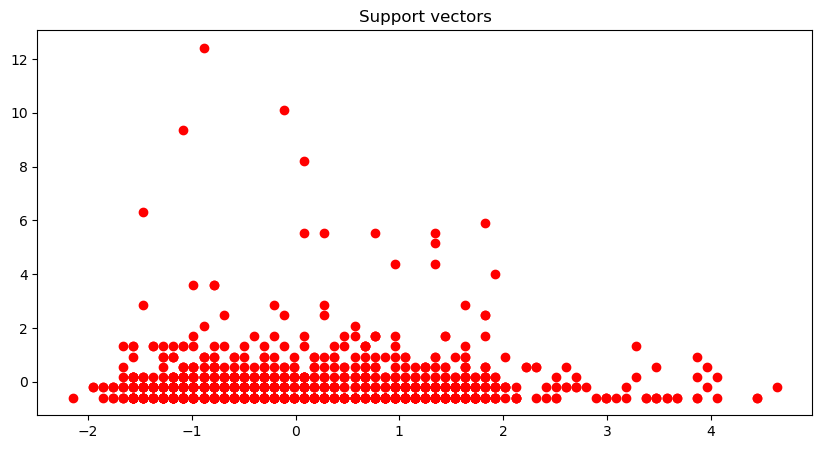

In [279]:
# if the outcome is linear, show the coefficients
if (svm_model.named_steps['svm'].kernel == 'linear'):   
    coefficients = svm_model.named_steps['svm'].coef_[0]
    indices = np.argsort(np.abs(coefficients))[::-1]

    print("Coefficient ranking:")
    for f in range(X.shape[1]):
        print(f"{f + 1}. feature {indices[f]} ({coefficients[indices[f]]}) - {X.columns[indices[f]]}")

    # plot the coefficients
    plt.figure(figsize=(10, 5))
    plt.title("Coefficient values")
    plt.bar(range(X.shape[1]), coefficients[indices], align='center')
    plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

#if the outcome is rbf, show the support vectors
if (svm_model.named_steps['svm'].kernel == 'rbf'):
    support_vectors = svm_model.named_steps['svm'].support_vectors_
    print(f'Support vectors: {support_vectors}')

    #plot the support vectors
    plt.figure(figsize=(10, 5))
    plt.title("Support vectors")
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='r')
    plt.show()
    


In [217]:
# build a dataframe to store the results

res_dict = {'model': ['k Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Support Vector Machine'],
            'train score': [0, 0, 0, 0],
            'test score': [0, 0, 0, 0],
            'accuracy': [0, 0, 0, 0],
            'precision': [0, 0, 0, 0],
            'recall': [0, 0, 0, 0],
            'f1': [0, 0, 0, 0],
            'roc_auc': [0, 0, 0, 0],
            'fit time': [0, 0, 0, 0]}
results_df = pd.DataFrame(res_dict).set_index('model')

### Run all the grid searches and build the results dataframe

In [288]:
from time import time

def run_grids(X, y, title, n_iter=1, verbose=False, scoring='accuracy'):
    for iter in range(n_iter): 
        seed = np.random.randint(1000)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        knn_model = knn_search(X_train, y_train, verbose, scoring)
        lgr_model = lgr_search(X_train, y_train, verbose, scoring)
        dt_model = dt_model_search(X_train, y_train, verbose, scoring)
        svm_model = svm_search(X_train, y_train, verbose, scoring)

        models = [knn_model, lgr_model, dt_model, svm_model]

        for i, model in enumerate(models):
            start = time()
            model.fit(X_train, y_train)
            end = time()
            fit_time = end - start

            preds = model.predict(X_test)
            
            results_df.loc[results_df.index[i], 'train score'] = model.score(X_train, y_train)
            results_df.loc[results_df.index[i], 'test score'] = model.score(X_test, y_test)
            results_df.loc[results_df.index[i], 'fit time'] = fit_time
            results_df.loc[results_df.index[i], 'accuracy'] = accuracy_score(y_test, preds)
            results_df.loc[results_df.index[i], 'precision'] = precision_score(y_test, preds)
            results_df.loc[results_df.index[i], 'recall'] = recall_score(y_test, preds)
            results_df.loc[results_df.index[i], 'f1'] = f1_score(y_test, preds)
            results_df.loc[results_df.index[i], 'roc_auc'] = roc_auc_score(y_test, preds)

        #save the results to a csv file
        results_df.to_csv(f'./data/{title}.{seed}_results.csv')

        if (verbose) :
            print(f'\nResults: Iteration-{iter+1} - Seed={seed}\n--------')
            print(results_df)








In [289]:

run_grids(X_train, y_train, 'Bank Data', 5, True, 'precision')


K-Nearest Neighbors:
-------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Parameters: {'knn__n_neighbors': 8, 'knn__p': 2, 'knn__weights': 'uniform'}
Accuracy: 0.7249079025549614

Logistic Regression:
-------------------
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Parameters:{'C': 0.01}
Accuracy:0.6592156862745098

Decision Tree Classifier:
------------------------

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Parameters: {'max_depth': 3, 'max_features': 15}
Accuracy: 0.7759990009990011

Support Vector Machine:
----------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Accuracy: 0.7302413273001508

Results: Iteration-1 - Seed=329
--------
                        train score  test score  accuracy  precision  \
model                                                                  
k Nearest Neighbors        0.906677    0.893778  0.893778   0.421053   
Logistic Regression        0.900607    0.895296  0.895296   0.461538   
Decision Tree              0.903263    0.895296  0.895296   0.400000   
Support Vector Machine     0.907815    0.898331  0.898331   0.500000   

                          recall        f1   roc_auc  fit time  
model                                                           
k Nearest Neighbors     0.119403  0.186047  0.550411  0.003760  
Logistic Regression     0.179104  0.258065  0.577728  0.022827  
Decision Tree           0.059701  0.103896  0.524783  0.002654  
Support Vector Machine  0.134328  0.211765  0.559563  0.088639  

K-Nearest Neighbors:
-------------

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Parameters: {'max_depth': 3, 'max_features': 18}
Accuracy: 0.732969696969697

Support Vector Machine:
----------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Parameters: {'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Accuracy: 0.6452813852813852

Results: Iteration-2 - Seed=509
--------
                        train score  test score  accuracy  precision  \
model                                                                  
k Nearest Neighbors        0.898331    0.915023  0.915023   0.687500   
Logistic Regression        0.895296    0.910470  0.910470   0.571429   
Decision Tree              0.897951    0.916540  0.916540   0.733333   
Support Vector Machine     0.904780    0.913505  0.913505   0.619048   

                          recall        f1   roc_auc  fit time  
model                                                           
k Nearest Neighbors     0.177419  0.282051  0.584522  0.003661  
Logistic Regression     0.193548  0.289157  0.589237  0.032762  
Decision Tree           0.177419  0.285714  0.585360  0.001984  
Support Vector Machine  0.209677  0.313253  0.598139  0.097266  

K-Nearest Neighbors:
--------------

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Parameters: {'max_depth': 3, 'max_features': 15}
Accuracy: 0.7592105263157894

Support Vector Machine:
----------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Accuracy: 0.6746114996114996

Results: Iteration-3 - Seed=866
--------
                        train score  test score  accuracy  precision  \
model                                                                  
k Nearest Neighbors        0.905159    0.880121  0.880121   0.428571   
Logistic Regression        0.903642    0.886191  0.886191   0.545455   
Decision Tree              0.901366    0.887709  0.887709   1.000000   
Support Vector Machine     0.908574    0.890744  0.890744   0.666667   

                          recall        f1   roc_auc  fit time  
model                                                           
k Nearest Neighbors     0.077922  0.131868  0.532088  0.003164  
Logistic Regression     0.155844  0.242424  0.569331  0.063741  
Decision Tree           0.038961  0.075000  0.519481  0.001424  
Support Vector Machine  0.129870  0.217391  0.560640  0.123365  

K-Nearest Neighbors:
-------------

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Parameters: {'max_depth': 3, 'max_features': 15}
Accuracy: 0.7490196078431371

Support Vector Machine:
----------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Accuracy: 0.6384848484848484

Results: Iteration-4 - Seed=14
--------
                        train score  test score  accuracy  precision  \
model                                                                  
k Nearest Neighbors        0.905159    0.899848  0.899848   0.555556   
Logistic Regression        0.897193    0.908953  0.908953   0.769231   
Decision Tree              0.897572    0.904401  0.904401   1.000000   
Support Vector Machine     0.907815    0.904401  0.904401   0.642857   

                          recall        f1   roc_auc  fit time  
model                                                           
k Nearest Neighbors     0.074627  0.131579  0.533935  0.003873  
Logistic Regression     0.149254  0.250000  0.572093  0.045806  
Decision Tree           0.059701  0.112676  0.529851  0.001451  
Support Vector Machine  0.134328  0.222222  0.562941  0.117380  

K-Nearest Neighbors:
--------------

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Parameters: {'max_depth': 3, 'max_features': 15}
Accuracy: 0.6929824561403509

Support Vector Machine:
----------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Parameters: {'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Accuracy: 0.5905963317728024

Results: Iteration-5 - Seed=54
--------
                        train score  test score  accuracy  precision  \
model                                                                  
k Nearest Neighbors        0.907056    0.889226  0.889226   0.538462   
Logistic Regression        0.900607    0.896813  0.896813   0.650000   
Decision Tree              0.900607    0.892261  0.892261   0.714286   
Support Vector Machine     0.907815    0.901366  0.901366   0.846154   

                          recall        f1   roc_auc  fit time  
model                                                           
k Nearest Neighbors     0.094595  0.160920  0.542169  0.003670  
Logistic Regression     0.175676  0.276596  0.581855  0.036166  
Decision Tree           0.067568  0.123457  0.532074  0.001469  
Support Vector Machine  0.148649  0.252874  0.572615  0.092044  


/var/folders/v0/7hny_wjs4tg70rryd7blqpd00000gn/T/ipykernel_5456/3560339292.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


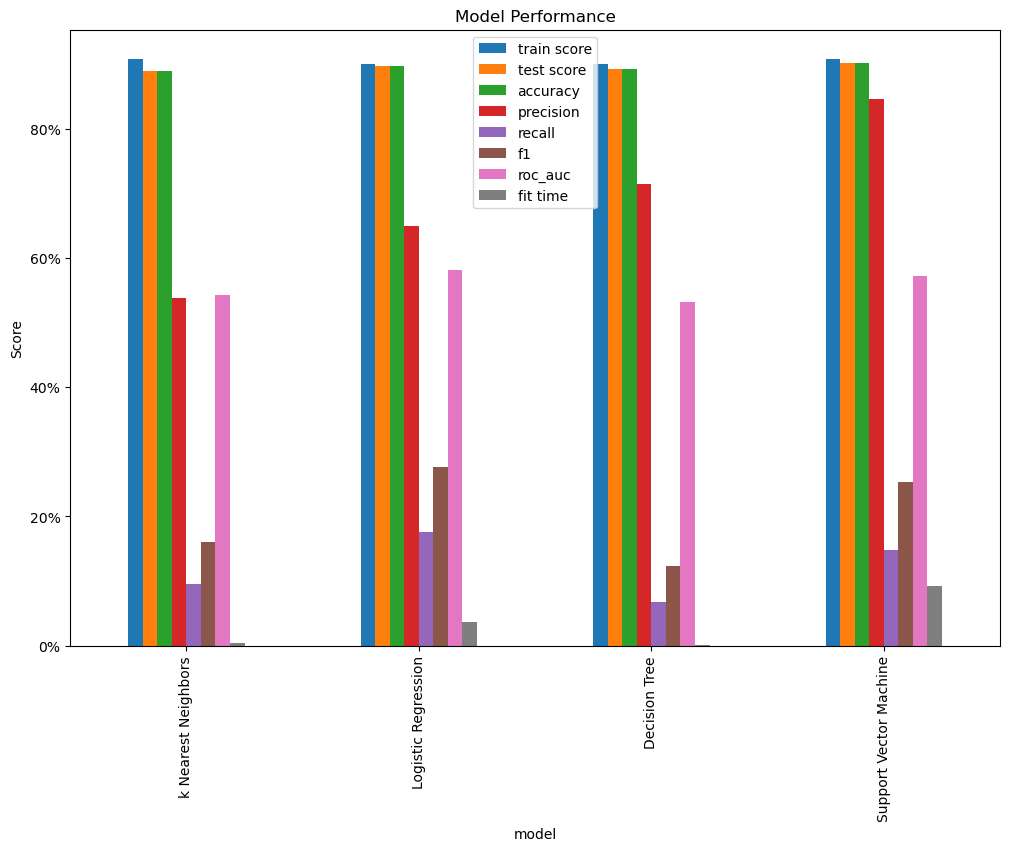

In [290]:
#plot the results
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance')
plt.ylabel('Score')
#make the y axis labels percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.show()


/var/folders/v0/7hny_wjs4tg70rryd7blqpd00000gn/T/ipykernel_5456/3122446590.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


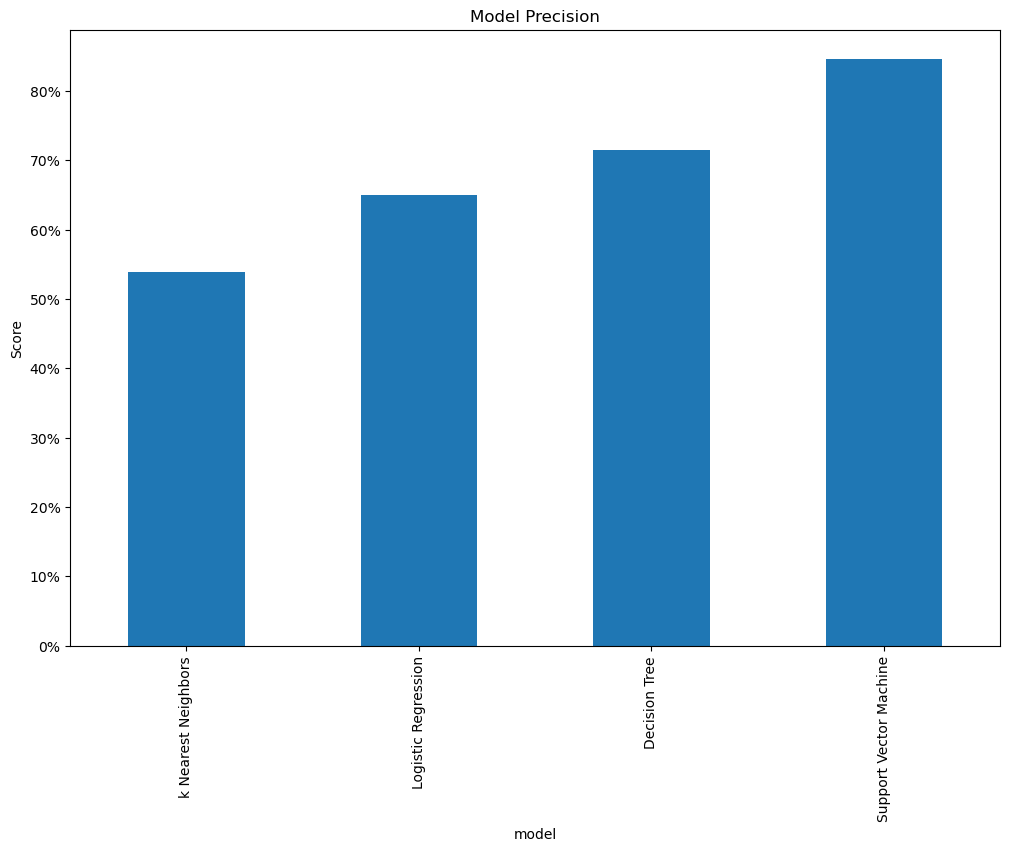

In [291]:
# plot the precision results
results_df['precision'].plot(kind='bar', figsize=(12, 8))
plt.title('Model Precision')
plt.ylabel('Score')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.show()


# Comparison Matrix for Model Types

| **Model**                  | **Handles Imbalanced Classes** | **Training Speed**     | **Interpretability** |
|----------------------------|--------------------------------|------------------------|----------------------|
| **Logistic Regression**     | Fair <br>(can use regularization, balanced class weights) | Fast                  | High <br>(coefficients are interpretable) |
| **Decision Trees**          | Fair <br>(prone to overfitting with imbalanced data) | Fast                  | High <br>(easy to visualize decision rules) |
| **k-Nearest Neighbors (k-NN)** | Poor <br>(sensitive to imbalanced data, performs poorly without special techniques) | Slow <br>(scales poorly with large datasets) | Low <br>(no interpretable model structure) |
| **Support Vector Machines (SVM)** | Poor <br>(sensitive to imbalance, can use class weights) | Slow <br>(especially for large datasets) | Low <br>(hard to interpret, especially in high dimensions) |
